# Interactive Example

In [16]:
from gradio_client import Client
import obspy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
model = "ai4eps/phasenet"

## 2. Prepare seismic waveforms

Find more details in obspy's tutorials: 

[FDSN web service client for ObsPy](https://docs.obspy.org/packages/obspy.clients.fdsn.html#module-obspy.clients.fdsn)

[Mass Downloader for FDSN Compliant Web Services](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.mass_downloader.html#module-obspy.clients.fdsn.mass_downloader)



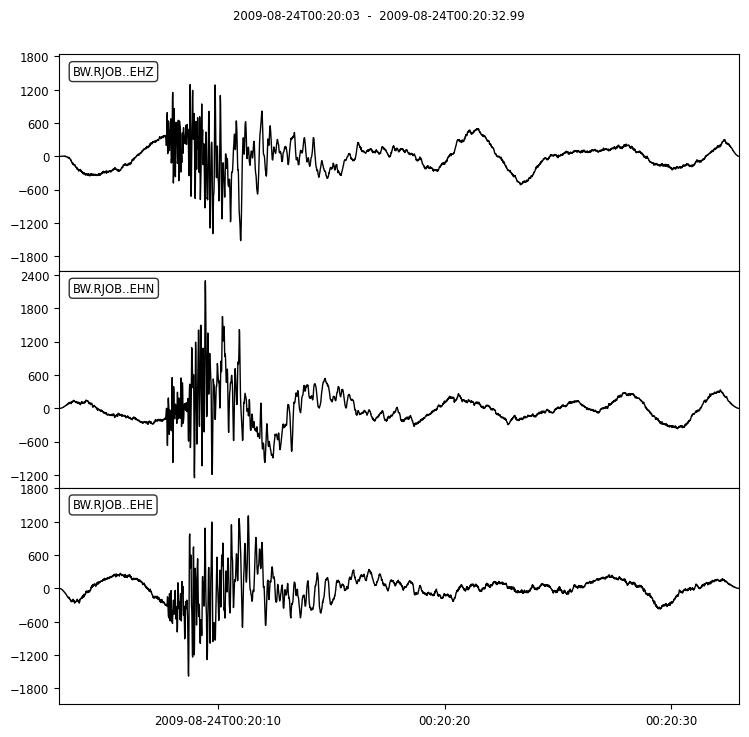

In [6]:
import obspy
stream = obspy.read()
stream.plot();

In [8]:
stream.write("data.mseed", format="MSEED")

## 3. Predict P/S-phase picks using PhaseNet

In [21]:
client = Client("ai4eps/phasenet") 
json, csv = client.predict(["data.mseed"])

Loaded as API: https://ai4eps-phasenet.hf.space ✔


In [25]:
# with open(json, "r") as f:
#     picks = json.load(f)["data"]
picks = pd.read_csv(csv, parse_dates=["phase_time"])
print(picks)

               phase_time  phase_index  phase_score phase_type
0 2009-08-24 00:20:07.700          470        0.954          P
1 2009-08-24 00:20:08.700          570        0.839          S


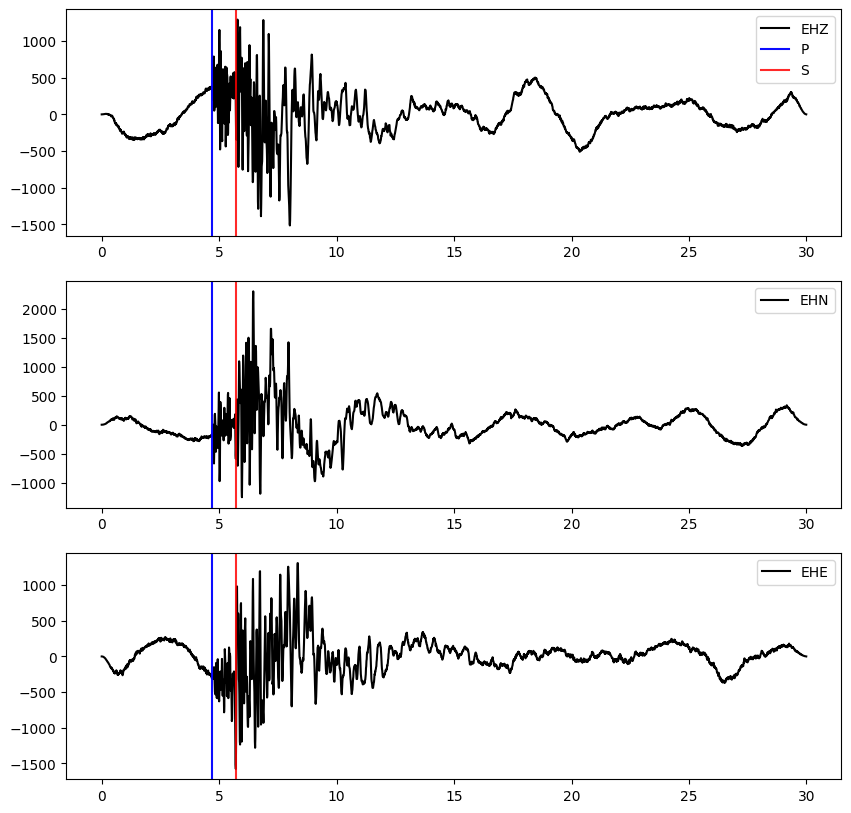

In [44]:
fig, ax = plt.subplots(len(stream), 1, figsize=(10, 10))
for i, tr in enumerate(stream):
    ax[i].plot(tr.times(), tr.data, label=tr.stats.channel, c="k")
    for _, pick in picks.iterrows():
        c = "blue" if pick["phase_type"] == "P" else "red"
        label = pick["phase_type"] if i == 0 else None
        ax[i].axvline((pick["phase_time"]-tr.stats.starttime.datetime).total_seconds(), c=c, label=label, alpha=pick["phase_score"])
    ax[i].legend()